In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Index2018.csv')
df_comp = raw_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'],dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('d')
df_comp['spx'] = df_comp['spx'].fillna(method='ffill')
df_comp['nikkei'] = df_comp['nikkei'].fillna(method='ffill')
df_comp['dax'] = df_comp['dax'].fillna(method='ffill')
df_comp['ftse'] = df_comp['ftse'].fillna(method='ffill')
df_comp['market_value'] = df_comp['spx']
df_comp.drop(['spx', 'dax', 'ftse', 'nikkei'], axis=1, inplace=True)
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [3]:
wn=np.random.normal(loc=df['market_value'].mean(),scale=df['market_value'].std(),size=len(df))

In [4]:
df['wn']=wn

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,666.001675
1994-01-08,469.90,1696.384350
1994-01-09,469.90,1124.881697
1994-01-10,475.27,1313.992057
1994-01-11,474.13,783.596132


Text(0.5, 1.0, 'White Noise')

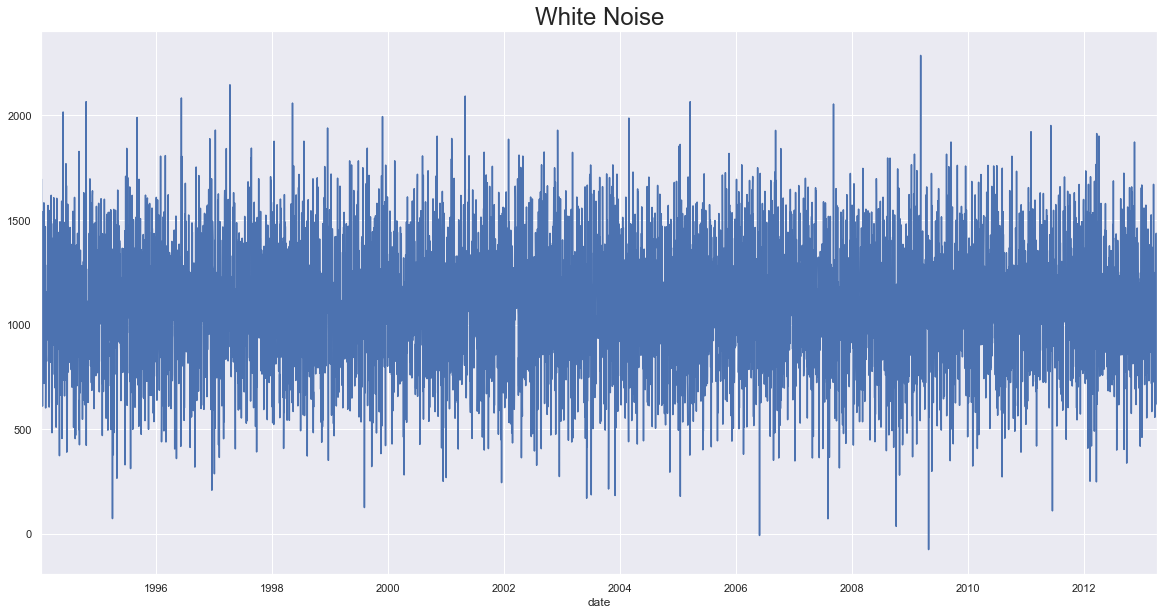

In [7]:
df['wn'].plot(figsize=(20,10))
plt.title('White Noise',size=24)

Text(0.5, 1.0, 'S&P Prices')

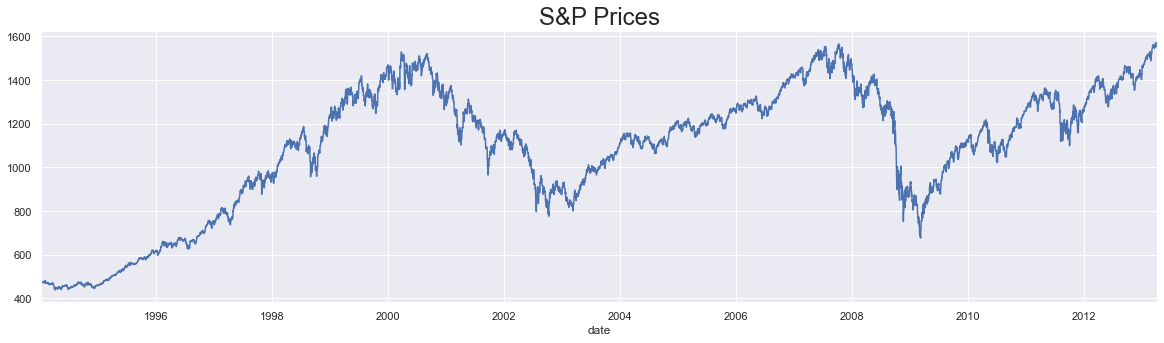

In [8]:
df['market_value'].plot(figsize=(20,5))
plt.title('S&P Prices',size=24)

In [5]:
rw=pd.read_csv('RandWalk.csv')

In [10]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [6]:
rw['date']=pd.to_datetime(rw['date'],dayfirst=True)

In [7]:
rw.set_index('date',inplace=True)

In [13]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [8]:
df['rw']=rw

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Random Walk')

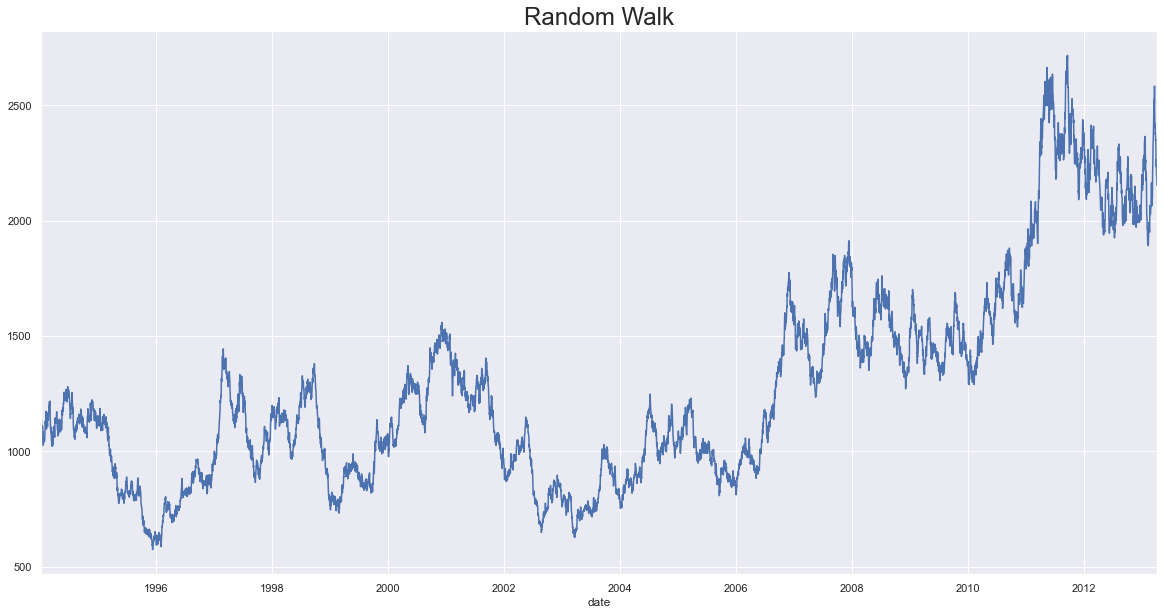

In [15]:
df['rw'].plot(figsize=(20,10))
plt.title('Random Walk',size=24)

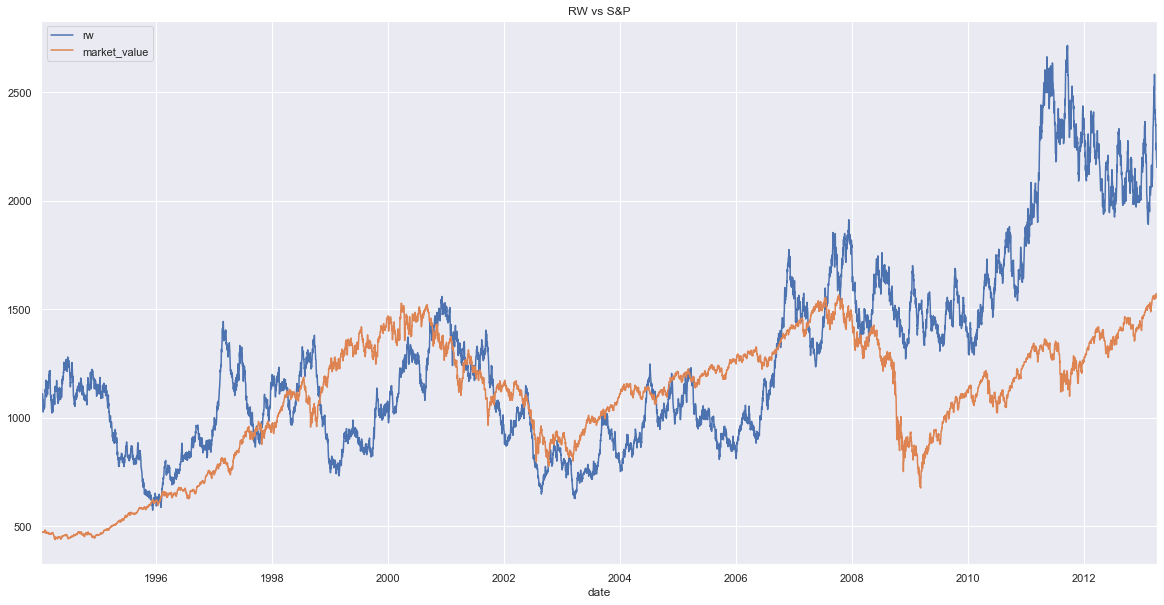

In [16]:
df['rw'].plot(figsize=(20,10))
df['market_value'].plot(figsize=(20,10))
plt.title('RW vs S&P')
plt.legend()

In [9]:
import statsmodels.tsa.stattools as sts

In [10]:
df['rw']

date
1994-01-07    1122.139662
1994-01-08    1135.238562
1994-01-09    1109.897831
1994-01-10    1080.347860
1994-01-11    1082.095245
                 ...     
2013-04-03    2190.787688
2013-04-04    2195.240033
2013-04-05    2152.992143
2013-04-06            NaN
2013-04-07            NaN
Freq: D, Name: rw, Length: 7031, dtype: float64

In [11]:
sts.adfuller(df['rw'][:7025])

(-1.3868516995273235,
 0.5885630952322496,
 0,
 7024,
 {'1%': -3.4312813341993733,
  '5%': -2.86195157511418,
  '10%': -2.566989077436586},
 62506.193101436416)

In [12]:
sts.adfuller(df['market_value'])

(-1.7364606411471242,
 0.41243147644381334,
 27,
 7003,
 {'1%': -3.4312841280297612,
  '5%': -2.861952809569395,
  '10%': -2.5669897345585904},
 53607.23037937771)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
s_dec_addi=seasonal_decompose(df['market_value'],model='additive')

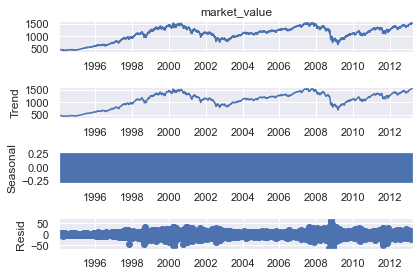

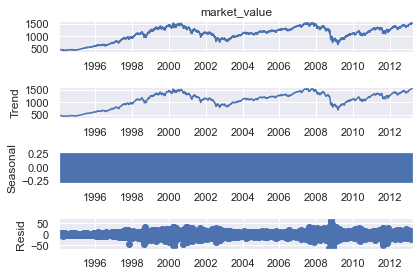

In [15]:
s_dec_addi.plot()

In [15]:
s_dec_mul=seasonal_decompose(df['market_value'],model='multiplicative')

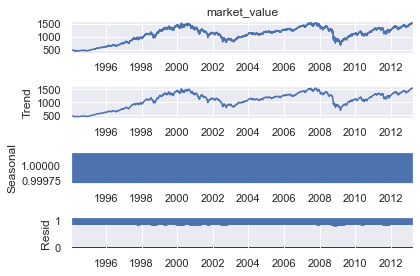

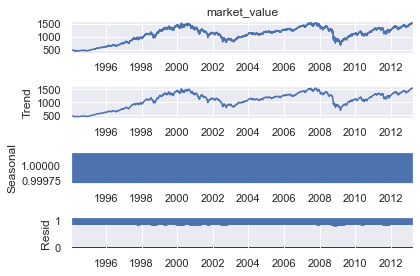

In [18]:
s_dec_mul.plot()

In [16]:
import statsmodels.graphics.tsaplots as sgt

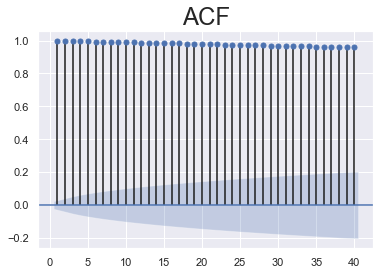

In [20]:
sgt.plot_acf(df['market_value'],lags=40,zero=False)
plt.title('ACF',size=24)
plt.show()

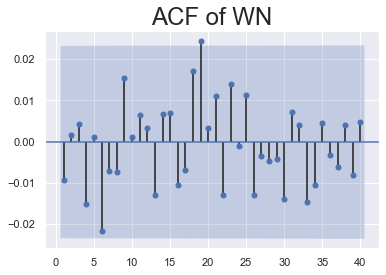

In [22]:
sgt.plot_acf(df['wn'],lags=40,zero=False)
plt.title('ACF of WN',size=24)
plt.show()

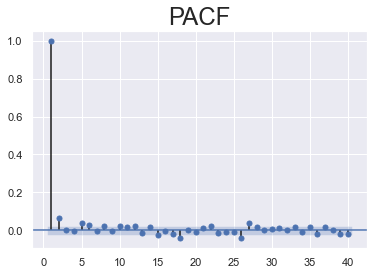

In [23]:
sgt.plot_pacf(df['market_value'],lags=40,zero=False,method='ols')
plt.title('PACF',size=24)
plt.show()

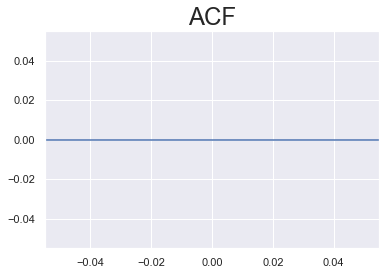

In [24]:
sgt.plot_acf(df['rw'],lags=40,zero=False)
plt.title('ACF',size=24)
plt.show()

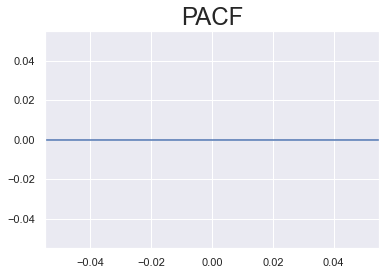

In [25]:
sgt.plot_pacf(df['rw'],lags=40,zero=False)
plt.title('PACF',size=24)
plt.show()

In [17]:
raw_data = pd.read_csv('Index2018.csv')
df_comp = raw_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'],dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('d')
df_comp['spx'] = df_comp['spx'].fillna(method='ffill')
df_comp['nikkei'] = df_comp['nikkei'].fillna(method='ffill')
df_comp['dax'] = df_comp['dax'].fillna(method='ffill')
df_comp['ftse'] = df_comp['ftse'].fillna(method='ffill')
df_comp['market_value'] = df_comp['ftse']
df_comp.drop(['spx', 'dax', 'ftse', 'nikkei'], axis=1, inplace=True)
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [18]:
df_comp.head()

,market_value
date,
1994-01-07,3445.98
1994-01-08,3445.98
1994-01-09,3445.98
1994-01-10,3440.58
1994-01-11,3413.77


Text(0.5, 1.0, 'ACF')

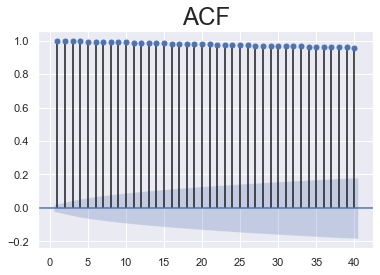

In [20]:
sgt.plot_acf(df_comp['market_value'],zero=False,lags=40)
plt.title('ACF',size=24)

Text(0.5, 1.0, 'ACF')

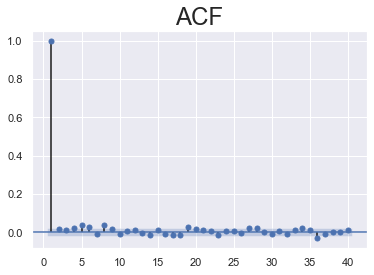

In [21]:
sgt.plot_pacf(df_comp['market_value'],zero=False,method=('ols'),lags=40)
plt.title('ACF',size=24)

In [18]:
from statsmodels.tsa.arima_model import ARMA

In [19]:
from scipy.stats.distributions import chi2

In [20]:
model_ar=ARMA(df_comp['market_value'],order=(1,0))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
results_model_ar=model_ar.fit()

In [26]:
results_model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(1, 0)   Log Likelihood              -46739.701
Method:                       css-mle   S.D. of innovations             49.336
Date:                Mon, 07 Sep 2020   AIC                          93485.402
Time:                        21:19:31   BIC                          93506.646
Sample:                    01-07-1994   HQIC                         93492.639
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5553.3272    675.587      8.220      0.000    4229.202    6877.452
ar.L1.market_value     0.9993      0.000   2382.348      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
model_ar_2=ARMA(df_comp['market_value'],order=(2,0))
results_model_ar_2=model_ar_2.fit()
results_model_ar_2.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(2, 0)   Log Likelihood              -46738.418
Method:                       css-mle   S.D. of innovations             49.329
Date:                Mon, 07 Sep 2020   AIC                          93484.835
Time:                        21:25:19   BIC                          93513.160
Sample:                    01-07-1994   HQIC                         93494.485
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5553.7288    689.958      8.049      0.000    4201.435    6906.022
ar.L1.market_value     0.9822      0.011     93.025      0.000       0.962       1.003
ar.L2.market_value     0.0171      0.011      1.618      0.106      -0.004       0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           +0.0000j            1.0007            0.0000
AR.2          -58.4608           +0.0000j           58.4608            0.5000
-----------------------------------------------------------------------------
"""

In [28]:
model_ar_3=ARMA(df_comp['market_value'],order=(3,0))
results_model_ar_3=model_ar_3.fit()
results_model_ar_3.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(3, 0)   Log Likelihood              -46737.697
Method:                       css-mle   S.D. of innovations             49.325
Date:                Mon, 07 Sep 2020   AIC                          93485.394
Time:                        21:37:25   BIC                          93520.800
Sample:                    01-07-1994   HQIC                         93497.456
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.7490    685.561      7.911      0.000    4080.074    6767.424
ar.L1.market_value     0.9820      0.011     93.041      0.000       0.961       1.003
ar.L2.market_value     0.0046      0.015      0.309      0.758      -0.025       0.034
ar.L3.market_value     0.0127      0.011      1.193      0.233      -0.008       0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           -0.0000j            1.0006           -0.0000
AR.2           -0.6806           -8.8336j            8.8598           -0.2622
AR.3           -0.6806           +8.8336j            8.8598            0.2622
-----------------------------------------------------------------------------
"""

In [29]:
model_ar_4=ARMA(df_comp['market_value'],order=(4,0))
results_model_ar_4=model_ar_4.fit()
results_model_ar_4.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(4, 0)   Log Likelihood              -46735.806
Method:                       css-mle   S.D. of innovations             49.315
Date:                Mon, 07 Sep 2020   AIC                          93483.613
Time:                        21:38:40   BIC                          93526.100
Sample:                    01-07-1994   HQIC                         93498.087
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.7492    703.550      7.709      0.000    4044.817    6802.681
ar.L1.market_value     0.9818      0.011     93.164      0.000       0.961       1.002
ar.L2.market_value     0.0045      0.015      0.302      0.762      -0.025       0.034
ar.L3.market_value    -0.0076      0.015     -0.510      0.610      -0.037       0.022
ar.L4.market_value     0.0207      0.011      1.945      0.052      -0.000       0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           -0.0000j            1.0006           -0.0000
AR.2            1.5736           -3.2048j            3.5703           -0.1774
AR.3            1.5736           +3.2048j            3.5703            0.1774
AR.4           -3.7802           -0.0000j            3.7802           -0.5000
-----------------------------------------------------------------------------
"""

In [30]:
model_ar_5=ARMA(df_comp['market_value'],order=(5,0))
results_model_ar_5=model_ar_5.fit()
results_model_ar_5.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(5, 0)   Log Likelihood              -46729.874
Method:                       css-mle   S.D. of innovations             49.281
Date:                Mon, 07 Sep 2020   AIC                          93473.747
Time:                        21:39:23   BIC                          93523.316
Sample:                    01-07-1994   HQIC                         93490.634
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.7492    736.670      7.363      0.000    3979.903    6867.595
ar.L1.market_value     0.9810      0.011     93.427      0.000       0.960       1.002
ar.L2.market_value     0.0048      0.015      0.322      0.747      -0.024       0.034
ar.L3.market_value    -0.0078      0.015     -0.522      0.602      -0.037       0.021
ar.L4.market_value    -0.0153      0.015     -1.025      0.305      -0.045       0.014
ar.L5.market_value     0.0367      0.011      3.446      0.001       0.016       0.058
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           -0.0000j            1.0006           -0.0000
AR.2            1.4490           -1.6528j            2.1980           -0.1354
AR.3            1.4490           +1.6528j            2.1980            0.1354
AR.4           -1.7409           -1.6126j            2.3731           -0.3811
AR.5           -1.7409           +1.6126j            2.3731            0.3811
-----------------------------------------------------------------------------
"""

In [31]:
model_ar_6=ARMA(df_comp['market_value'],order=(6,0))
results_model_ar_6=model_ar_6.fit()
results_model_ar_6.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(6, 0)   Log Likelihood              -46726.897
Method:                       css-mle   S.D. of innovations             49.264
Date:                Mon, 07 Sep 2020   AIC                          93469.794
Time:                        21:40:37   BIC                          93526.444
Sample:                    01-07-1994   HQIC                         93489.093
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.7491    761.371      7.124      0.000    3931.489    6916.009
ar.L1.market_value     0.9800      0.010     93.565      0.000       0.960       1.001
ar.L2.market_value     0.0052      0.015      0.350      0.727      -0.024       0.034
ar.L3.market_value    -0.0076      0.015     -0.508      0.611      -0.037       0.022
ar.L4.market_value    -0.0154      0.015     -1.034      0.301      -0.045       0.014
ar.L5.market_value     0.0112      0.015      0.751      0.453      -0.018       0.040
ar.L6.market_value     0.0260      0.011      2.441      0.015       0.005       0.047
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2            1.3883           -1.2437j            1.8639           -0.1163
AR.3            1.3883           +1.2437j            1.8639            0.1163
AR.4           -0.9248           -1.9575j            2.1649           -0.3202
AR.5           -0.9248           +1.9575j            2.1649            0.3202
AR.6           -2.3584           -0.0000j            2.3584           -0.5000
-----------------------------------------------------------------------------
"""

In [32]:
model_ar_7=ARMA(df_comp['market_value'],order=(7,0))
results_model_ar_7=model_ar_7.fit()
results_model_ar_7.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(7, 0)   Log Likelihood              -46726.270
Method:                       css-mle   S.D. of innovations             49.261
Date:                Mon, 07 Sep 2020   AIC                          93470.541
Time:                        21:42:27   BIC                          93534.272
Sample:                    01-07-1994   HQIC                         93492.253
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.7490    749.862      7.233      0.000    3954.046    6893.452
ar.L1.market_value     0.9803      0.010     93.446      0.000       0.960       1.001
ar.L2.market_value     0.0053      0.015      0.358      0.720      -0.024       0.034
ar.L3.market_value    -0.0078      0.015     -0.521      0.603      -0.037       0.021
ar.L4.market_value    -0.0155      0.015     -1.040      0.298      -0.045       0.014
ar.L5.market_value     0.0113      0.015      0.755      0.450      -0.018       0.041
ar.L6.market_value     0.0377      0.015      2.527      0.012       0.008       0.067
ar.L7.market_value    -0.0119      0.011     -1.119      0.263      -0.033       0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.9525           -0.0000j            1.9525           -0.5000
AR.3           -0.9016           -1.6581j            1.8874           -0.3293
AR.4           -0.9016           +1.6581j            1.8874            0.3293
AR.5            1.2411           -1.4022j            1.8725           -0.1347
AR.6            1.2411           +1.4022j            1.8725            0.1347
AR.7            3.4321           -0.0000j            3.4321           -0.0000
-----------------------------------------------------------------------------
"""

In [33]:
model_ar_8=ARMA(df_comp['market_value'],order=(8,0))
results_model_ar_8=model_ar_8.fit()
results_model_ar_8.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 8789
Model:                     ARMA(8, 0)   Log Likelihood              -46720.730
Method:                       css-mle   S.D. of innovations             49.230
Date:                Mon, 07 Sep 2020   AIC                          93461.461
Time:                        21:43:24   BIC                          93532.273
Sample:                    01-07-1994   HQIC                         93485.585
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.7492    784.480      6.914      0.000    3886.196    6961.302
ar.L1.market_value     0.9808      0.010     93.951      0.000       0.960       1.001
ar.L2.market_value     0.0040      0.015      0.269      0.788      -0.025       0.033
ar.L3.market_value    -0.0082      0.015     -0.548      0.584      -0.037       0.021
ar.L4.market_value    -0.0150      0.015     -1.004      0.316      -0.044       0.014
ar.L5.market_value     0.0116      0.015      0.775      0.438      -0.018       0.041
ar.L6.market_value     0.0375      0.015      2.515      0.012       0.008       0.067
ar.L7.market_value    -0.0467      0.015     -3.130      0.002      -0.076      -0.017
ar.L8.market_value     0.0355      0.011      3.330      0.001       0.015       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.5466           -0.0000j            1.5466           -0.5000
AR.3           -0.9248           -1.2504j            1.5552           -0.3514
AR.4           -0.9248           +1.2504j            1.5552            0.3514
AR.5            1.3946           -0.8073j            1.6115           -0.0835
AR.6            1.3946           +0.8073j            1.6115            0.0835
AR.7            0.4614           -1.6386j            1.7024           -0.2063
AR.8            0.4614           +1.6386j            1.7024            0.2063
-----------------------------------------------------------------------------
"""

In [34]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [35]:
LLR_test(model_ar_2,model_ar_3)

0.23

In [36]:
LLR_test(model_ar_2,model_ar_4)

0.022

In [37]:
LLR_test(model_ar_4,model_ar_5)

0.001

In [38]:
LLR_test(model_ar_5,model_ar_6)

0.015

In [39]:
LLR_test(model_ar_6,model_ar_7)

0.263

In [40]:
LLR_test(model_ar_6,model_ar_8)

0.0